In [1]:
import utilities as utils


    Last Execution: 2022-03-16 09:53:01.204372
    python:	3.8.5

    	fastai:		2.5.3
    	matplotlib:	3.3.3
    	numpy:		1.19.2
    	pandas:		1.2.0
    	seaborn:	0.11.2
    	sklearn:	1.0.2
    	yellowbrick:	1.4
    	imbalanced learn:	0.9.0
    


In [2]:
# This code is used to scale to processing numerous datasets
data_path_1: str = '../../../../Data/phase1/'   

data_set_1: list = [ 'Darknet_reduced_features.csv' ]

data_set: list  = data_set_1
file_path_1      = utils.get_file_path(data_path_1)
file_set: list   = list(map(file_path_1, data_set_1))
current_job: int = 0

utils.data_set = data_set
utils.file_set = file_set


In [3]:
print(f'We will be cleaning {len(file_set)} files:')
utils.pretty(file_set)

We will be cleaning 1 files:
[   '../../../../Data/phase1/Darknet_reduced_features.csv']


## Label Analysis

Now we load the data and separate the dataset by label, giving us a traffic dataset and an application dataset. We also want to investigate how merging the Non-Tor and NonVNP labels together affects the clustering, so rename the samples under these labels as regular and produce a second traffic dataset with it.

In [4]:
dataset_1            : dict = utils.examine_dataset(1)
traffic_dataset_1    : dict = utils.package_data_for_inspection_with_label(utils.prune_dataset(dataset_1, ['Application Type']), 'Traffic_Dataset_1_Tor_VPN_Non_Tor_NonVPN')
traffic_dataset_2    : dict = utils.package_data_for_inspection_with_label(utils.rename_values_in_column(traffic_dataset_1, [('Traffic Type', {'Non-Tor': 'Regular', 'NonVPN': 'Regular'})]), 'Traffic_Dataset_2_Tor_VPN_Regular')
application_dataset_1: dict = utils.package_data_for_inspection_with_label(utils.prune_dataset(dataset_1, ['Traffic Type']), 'Application_Dataset_1')

Dataset 1/1: We now look at ../../../../Data/phase1/Darknet_reduced_features.csv


Loading Dataset: ../../../../Data/phase1/Darknet_reduced_features.csv
	To Dataset Cache: ./cache/Darknet_reduced_features.csv.pickle


        File:				../../../../Data/phase1/Darknet_reduced_features.csv  
        Job Number:			1
        Shape:				(141481, 64)
        Samples:			141481 
        Features:			64
    

        Shape:				(141481, 63)
        Samples:			141481 
        Features:			63
    

        Shape:				(141481, 63)
        Samples:			141481 
        Features:			63
    

        Shape:				(141481, 63)
        Samples:			141481 
        Features:			63
    


Now, we train deep neural networks to classify the datasets based on the labeling schemes outlaid above. We will use the confusion matrices to make inferences about the clustering of the data.

(141481, 63)


epoch,train_loss,valid_loss,accuracy,time
0,0.267627,0.280606,0.898855,00:12
1,0.223588,0.255066,0.911083,00:13
2,0.204608,0.209606,0.925148,00:13
3,0.186917,0.237418,0.918504,00:13
4,0.183569,0.247066,0.917656,00:13
5,0.162749,0.238849,0.919812,00:13
6,0.163834,0.192428,0.928188,00:14
7,0.151834,0.232353,0.917020,00:13
8,0.147440,0.275002,0.930450,00:12
9,0.154193,0.235108,0.924230,00:13


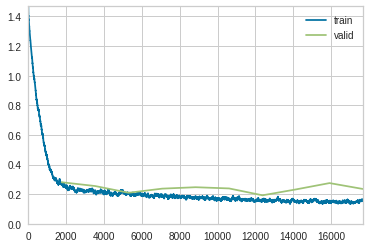

loss 0.2351076602935791: accuracy: 92.42%


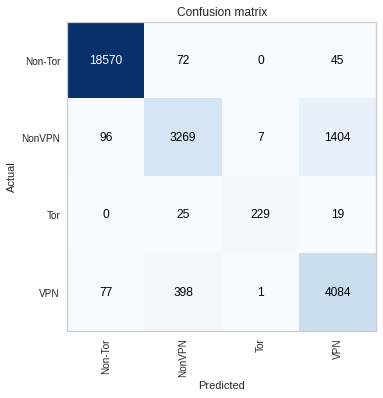

In [11]:
traffic_dataset_1['Results'] = utils.run_deep_nn_experiment(
    traffic_dataset_1['Dataset'], 
    traffic_dataset_1['File'],
    'Traffic Type',
    (100, 80)
)

(141481, 63)


epoch,train_loss,valid_loss,accuracy,time
0,0.220885,0.247118,0.916808,00:13
1,0.162702,0.208187,0.924265,00:12
2,0.155777,0.158206,0.950735,00:12
3,0.140327,0.205696,0.927340,00:12
4,0.137721,0.246210,0.922816,00:14
5,0.131769,0.184700,0.940522,00:13
6,0.135368,0.234018,0.927905,00:13
7,0.146775,0.242951,0.927905,00:12
8,0.133044,0.212617,0.935327,00:12
9,0.127417,0.186585,0.928789,00:13


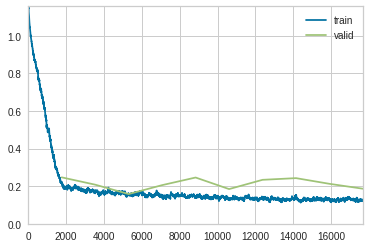

loss 0.18658484518527985: accuracy: 92.88%


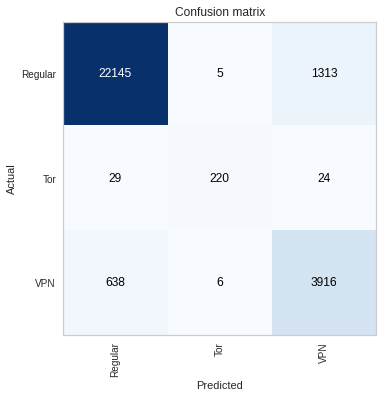

In [12]:
traffic_dataset_2['Results'] = utils.run_deep_nn_experiment(
    traffic_dataset_2['Dataset'], 
    traffic_dataset_2['File'],
    'Traffic Type',
    (100, 80)
)

(141481, 63)


epoch,train_loss,valid_loss,accuracy,time
0,0.857884,0.903638,0.702856,00:12
1,0.730434,0.808932,0.716426,00:12
2,0.678489,0.753026,0.728796,00:12
3,0.655986,0.700789,0.766716,00:12
4,0.638800,0.766028,0.735440,00:12
5,0.602868,0.704398,0.749788,00:12
6,0.582459,0.716593,0.751484,00:12
7,0.595254,0.966531,0.644296,00:12
8,0.581397,0.844470,0.672816,00:12
9,0.581312,0.687752,0.778202,00:12


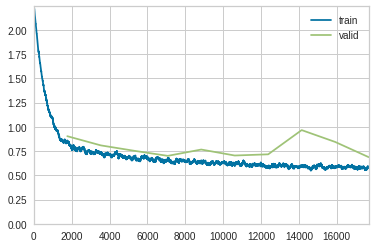

loss 0.6877516508102417: accuracy: 77.82%


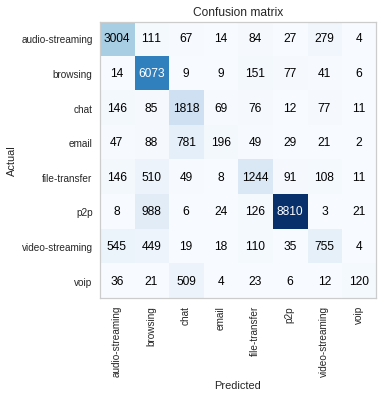

In [13]:
application_dataset_1['Results'] = utils.run_deep_nn_experiment(
    application_dataset_1['Dataset'], 
    application_dataset_1['File'],
    'Application Type',
    (100, 80)
)

# SMOTE Prototype

Here we load up our first SMOTE and train it on the whole traffic dataset. This way we have some data to play around with and can go about devising an augmentation strategy for the experiment process.

Class=3, n=93309 (25.000%)
Class=0, n=93309 (25.000%)
Class=1, n=93309 (25.000%)
Class=2, n=93309 (25.000%)


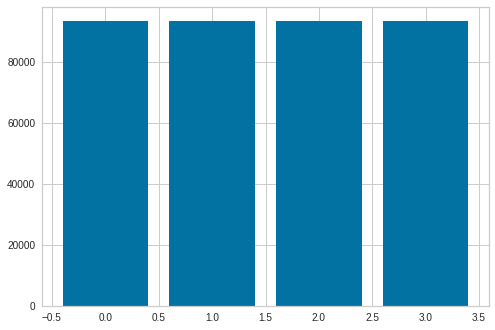

In [10]:
fake_df_traffic_1 = utils.create_and_visualize_smote(traffic_dataset_1['Dataset'], 'Traffic Type')

Class=2, n=117170 (33.333%)
Class=0, n=117170 (33.333%)
Class=1, n=117170 (33.333%)


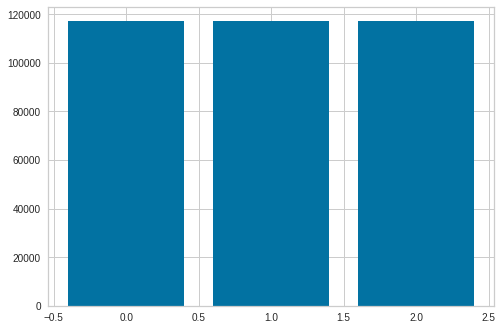

In [11]:
fake_df_traffic_2 = utils.create_and_visualize_smote(traffic_dataset_2['Dataset'], 'Traffic Type')

Class=4, n=48520 (12.500%)
Class=5, n=48520 (12.500%)
Class=3, n=48520 (12.500%)
Class=0, n=48520 (12.500%)
Class=2, n=48520 (12.500%)
Class=1, n=48520 (12.500%)
Class=7, n=48520 (12.500%)
Class=6, n=48520 (12.500%)


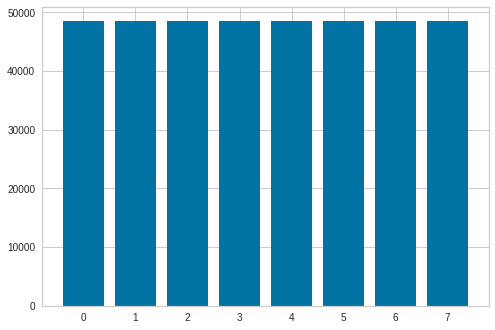

In [12]:
fake_df_application = utils.create_and_visualize_smote(application_dataset_1['Dataset'], 'Application Type')

In [ ]:
traffic_dataset_1    : dict = utils.package_data_for_inspection_with_label(utils.prune_dataset(dataset_1, ['Application Type']), 'Traffic_Dataset_1_Tor_VPN_Non_Tor_NonVPN')
traffic_dataset_2    : dict = utils.package_data_for_inspection_with_label(utils.rename_values_in_column(traffic_dataset_1, [('Traffic Type', {'Non-Tor': 'Regular', 'NonVPN': 'Regular'})]), 'Traffic_Dataset_2_Tor_VPN_Regular')
application_dataset_1: dict = utils.package_data_for_inspection_with_label(utils.prune_dataset(dataset_1, ['Traffic Type']), 'Application_Dataset_1')

In [13]:
fake_traffic_dataset_1: dict = utils.package_data_for_inspection_with_label(
    utils.prune_dataset(utils.package_data_for_inspection(fake_df_traffic_1), ['Traffic Type'] ), 
    'Fake_Traffic_Dataset_1_Tor_VPN_Non_Tor_NonVPN'
)

fake_traffic_dataset_2: dict = utils.package_data_for_inspection_with_label(
    utils.prune_dataset(utils.package_data_for_inspection(fake_df_traffic_2), ['Traffic Type'] ), 
    'Fake_Traffic_Dataset_2_Tor_VPN_Regualar'
)

fake_traffic_dataset_3: dict = utils.package_data_for_inspection_with_label(
    utils.prune_dataset(utils.package_data_for_inspection(fake_df_application), ['Application Type'] ), 
    'Fake_Traffic_Dataset_3_Application_Dataset'
)



    Dataset statistics:
        Shape:				(373236, 63)
        Samples:			373236 
        Features:			63
    

        Shape:				(373236, 63)
        Samples:			373236 
        Features:			63
    

    Dataset statistics:
        Shape:				(351510, 63)
        Samples:			351510 
        Features:			63
    

        Shape:				(351510, 63)
        Samples:			351510 
        Features:			63
    

    Dataset statistics:
        Shape:				(388160, 63)
        Samples:			388160 
        Features:			63
    

        Shape:				(388160, 63)
        Samples:			388160 
        Features:			63
    


In [14]:
fake_traffic_dataset_1['Dataset'].to_csv('./synthetic/smote/smote_balanced_traffic_dataset_1_traffic_labels.csv', index=False)
fake_traffic_dataset_2['Dataset'].to_csv('./synthetic/smote/smote_balanced_traffic_dataset_2_traffic_labels.csv', index=False)
fake_traffic_dataset_3['Dataset'].to_csv('./synthetic/smote/smote_balanced_application_dataset_3_traffic_labels.csv', index=False)

In [16]:
print(f'Last Execution: {utils.datetime.datetime.now()}')
assert False, 'Nothing after this point is included in the study'

Last Execution: 2022-03-16 10:04:12.580364


AssertionError: Nothing after this point is included in the study